# Homework 4
# Perceptron, SVM, and PCA

# <p style="text-align: right;"> &#9989; Evan Fatur</p>
# <p style="text-align: right;"> &#9989; _efatur2004_</p>

# Goal for this homework assignment
We have worked some basics on perceptron, SVM, and PCA in the pre-class and in-class assignments. In this homework assignment, we will:

* Continue to use git as the version control tool
* Work on unfamiliar data
* Use perceptron to classify data 
* Use SVM to classify data
* Use principal component analysis to facilitate classification


**This assignment is due by 11:59 pm on Friday, April 25th. Note that ONLY the copy on GITHUB will be graded.**  **There are 60 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.

---
# Part 1: Git repository (6 points)

You're going to add this assignment to the `cmse202-s25-turnin` repository you previously created. The history of progress on the assignment will be tracked via git commitments. 

**&#9989; Do the following**:

1. Navigate to your `cmse202-s25-turnin` **local** repository and create a new directory called `hw-04`

2. Move this notebook into that **new directory** in your repository. 

5. Double check to make sure your file is at the correct directory.

6. Once you're certain that file and directory are correct, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw04` to push your file to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

<font size=6 color="#009600">&#9998;</font> git clone https://github.com/efatur2004/CMSE202-f25-turnin.git

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s25-turnin`" repository inside the `hw-04` directory that you just created.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.

---
# Part 2: Deal with unfamiliar data (35 points)

## Warm up with perceptron for binary classification
## 2.1 Load up the dataset

This data is obtained from Kaggle/diabetes. It contains multiple measured values and a label for whether the patient is diagnosed as diabetic. 

* Use commands to dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/diabetes_prediction_dataset.csv`
* Use Pandas to load in the data and briefly examine it.
* Succeed data load-up gets **2 pt**. 

In [52]:
# put your code here
import pandas as pd

url = "https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/diabetes_prediction_dataset.csv"

data = pd.read_csv(url)

num_patients = data.shape[0]

features = data.columns

print(f"{num_patients}")
print(f"{features}")

100000
Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')


How many patients are in this dataset? What are features of the patients?

<font size=6 color="#009600">&#9998;</font> There are 100000 patients in the dataset and the features are:['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']

### Use your perceptron class built in Day18 and Day19 assignments to classify whether patients are diabetic.

* You should see that there are some features that are non-numerics.
* The first one is `gender`. Find the types of classes and convert them to numerics in your dataframe.
* The second one is `smoking_history`, convert those string labels to numerics.
* Note that since perceptron is a binary classifier, which only determines which side of the dividing line the data points reside, we should also convert the labels to `+1` and `-1`.
* Completing data conversion gets **5 pt**.

In [54]:
import numpy as np

data['gender'] = data['gender'].map({"Female": 1, "Male": 0})

data['smoking_history'] = data['smoking_history'].map({'never': 0, 'current': 1, 'former': 2, 'No Info': 3})

data['diabetes'] = data['diabetes'].map({1: +1, 0: -1})

print("Processed Data:")
print(data.head())

labeled_data = data.to_numpy()

Processed Data:
   gender   age  hypertension  heart_disease  smoking_history    bmi  \
0     1.0  80.0             0              1              0.0  25.19   
1     1.0  54.0             0              0              3.0  27.32   
2     0.0  28.0             0              0              0.0  27.32   
3     1.0  36.0             0              0              1.0  23.45   
4     0.0  76.0             1              1              1.0  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140        -1  
1          6.6                   80        -1  
2          5.7                  158        -1  
3          5.0                  155        -1  
4          4.8                  155        -1  


### Now all feature varilables are numerics.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---

## 2.2 Binary perceptron classifier

Copy your perceptron class to the cell below. 

* DO NOT use the one from statsmodel. We want to test the perceptron you built.
* Note that your predict method should output `+1` or `-1` for positive or negative values, respectively.
* A functional perceptron classifier gets **4 pt**.

In [ ]:
# copy your perceptron class to his cell

class Perceptron:
    def __init__(self, learning_rate=0.001, n_iters=5):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._sign
        self.weights = None
        self.bias = None

    def _sign(self, x):
        return np.where(x >= 0, 1, -1)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)


* Split data to 70-30 train-test sets **1 pt**.
* Train your perceptron.
* Show the accuracy of your pereptron **2 pt**.

In [ ]:
# put your code here
p = Perceptron(learning_rate=0.001, n_iters=10)
p.fit(X_train, y_train)

y_pred = p.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

* Use test set to evaulate the accuracy of your perceptron. What is your accuracy? (**2 pt**)

In [ ]:
# put your code here
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/diabetes_prediction_dataset.csv"
data = pd.read_csv(url)

data['gender'] = data['gender'].map({"Female": 1, "Male": 0})
data['smoking_history'] = data['smoking_history'].map({'never': 0, 'current': 1, 'former': 2, 'No Info': 3})
data['diabetes'] = data['diabetes'].map({1: +1, 0: -1})

X = data.iloc[:, :-1].values 
X = (X - X.mean(axis=0)) / X.std(axis=0)  
y = data.iloc[:, -1].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._sign
        self.weights = None
        self.bias = None

    def _sign(self, x):
        return np.where(x >= 0, 1, -1)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)

p = Perceptron(learning_rate=0.001, n_iters=10)
p.fit(X_train, y_train)

y_pred = p.predict(X_test)

accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


* There may be some ways to increase the accruacy, such as increasing the number of train iterations or adjust learning rate. Give a try to train a perceptron you can best get. Record the values of parameters and the optimal accuracy. (**3 pt**)


In [ ]:
# put your code here
url = "https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/diabetes_prediction_dataset.csv"
data = pd.read_csv(url)

data['gender'] = data['gender'].map({"Female": 1, "Male": 0})
data['smoking_history'] = data['smoking_history'].map({'never': 0, 'current': 1, 'former': 2, 'No Info': 3})
data['diabetes'] = data['diabetes'].map({1: +1, 0: -1})

X = data.iloc[:, :-1].values 
X = (X - X.mean(axis=0)) / X.std(axis=0)
y = data.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._sign
        self.weights = None
        self.bias = None

    def _sign(self, x):
        return np.where(x >= 0, 1, -1)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_func(linear_output)

def tune_perceptron(X_train, y_train, X_test, y_test, learning_rates, n_iter_values):
    best_accuracy = 0
    best_params = {"learning_rate": None, "n_iters": None}

    for lr in learning_rates:
        for n_iters in n_iter_values:
            p = Perceptron(learning_rate=lr, n_iters=n_iters)
            p.fit(X_train, y_train)

            y_pred = p.predict(X_test)

            accuracy = np.mean(y_pred == y_test)
            print(f"Learning Rate: {lr}, Iterations: {n_iters}, Accuracy: {accuracy * 100:.2f}%")

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params["learning_rate"] = lr
                best_params["n_iters"] = n_iters

    return best_params, best_accuracy

learning_rates = [0.001, 0.01, 0.1]
n_iter_values = [10, 100, 1000]

best_params, best_accuracy = tune_perceptron(X_train, y_train, X_test, y_test, learning_rates, n_iter_values)

print(f"\nBest Accuracy: {best_accuracy * 100:.2f}%")
print(f"Best Hyperparameters: Learning Rate = {best_params['learning_rate']}, Iterations = {best_params['n_iters']}")



### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

### 2.3 Next we shall test perceptron's capability of multiple-label classification.

* Dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv`.
* This is a customer category dataset (Kraggle/Customer Classification). Each cusmtoer has several feature variables.
* There are five categories of customers, which are non-numerics. Thus, let's convert those string labels to numerics.
* Successful data load-up gets **2 pt**.

In [9]:
# Download and load the dataset. Convert non-numerical labels to numerics.
# put your code here
import pandas as pd

url = "https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv"
data = pd.read_csv(url)

print("Initial Data:")
print(data.head())

category_mapping = {category: idx for idx, category in enumerate(data['custcat'].unique())}
data['custcat'] = data['custcat'].map(category_mapping)

print("\nProcessed Data:")
print(data.head())

data['region'] = data['region'].astype('category').cat.codes
data['marital'] = data['marital'].astype('category').cat.codes
data['address'] = data['address'].astype('category').cat.codes
data['ed'] = data['ed'].astype('category').cat.codes
data['employ'] = data['employ'].astype('category').cat.codes
data['retire'] = data['retire'].astype('category').cat.codes
data['gender'] = data['gender'].map({"Female": 1, "Male": 0})
data['reside'] = data['reside'].astype('category').cat.codes

print("\nFinal Processed Data:")
print(data.head())



Initial Data:
   region  tenure  age  income  marital  address  ed  employ  retire  gender  \
0       2      13   44      64        1        9   4       5       0       0   
1       3      11   33     136        1        7   5       5       0       0   
2       3      68   52     116        1       24   1      29       0       1   
3       2      33   33      33        0       12   2       0       0       1   
4       2      23   30      30        1        9   1       2       0       0   

   reside custcat  
0       2       A  
1       6       D  
2       2       C  
3       1       A  
4       4       C  

Processed Data:
   region  tenure  age  income  marital  address  ed  employ  retire  gender  \
0       2      13   44      64        1        9   4       5       0       0   
1       3      11   33     136        1        7   5       5       0       0   
2       3      68   52     116        1       24   1      29       0       1   
3       2      33   33      33        0       12

---
### 2.4 Multi-label perceptron classification

* As we know, perceptron is a binary classifier. For multiple-label classification, we can use One-vs-Rest (OvR) Strategy.
* In this case, let's train five individual perceptrons. 
* For each classifier, it treats the current class as "positive" and all others as "negative."
* When classifying a new sample, each classifier gives a "score," and the class with the highest score is chosen.

Copy your perceptron to the code cell below. We need to add a score method, which outputs dot of weights and features, as opposed to the previous binary predict method. The score method should output a signed floating score value, not `+1` or `-1`. This can be done by removing the binary segmenting, i.e., directly outputing the dot value.

* Functioning score() method gets **2 pt**.

In [23]:
# put your modified perceptron class here
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv"
data = pd.read_csv(url)

data['region'] = data['region'].astype('category').cat.codes
data['marital'] = data['marital'].astype('category').cat.codes
data['address'] = data['address'].astype('category').cat.codes
data['ed'] = data['ed'].astype('category').cat.codes
data['employ'] = data['employ'].astype('category').cat.codes
data['retire'] = data['retire'].astype('category').cat.codes
data['gender'] = data['gender'].astype('category').cat.codes
data['reside'] = data['reside'].astype('category').cat.codes

X = data.drop(columns=['custcat']) 
y = data['custcat'].values 

y = pd.Categorical(y).codes 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class Perceptron:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.array(X) 
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.max_iter):
            for i in range(X.shape[0]):
                score = np.dot(X[i], self.weights) + self.bias
                prediction = 1 if score > 0 else -1
                if prediction != y[i]:
                    self.weights += y[i] * X[i]
                    self.bias += y[i]

    def predict(self, X):
        score = np.dot(X, self.weights) + self.bias
        return np.where(score > 0, 1, -1)

    def score(self, X):
        return np.dot(X, self.weights) + self.bias

classifier = Perceptron(learning_rate=0.01, max_iter=1000)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.2167


* Now let's do a train-test split of the data with a test_size = 0.3.
* Since we are training 5 perceptrons, we should have have 5 class label sets. For instance, in the label set for category A, the label value will be `+1` if it's type A and otherwise `-1`.
* Setting label sets gets **4 pt**.

In [27]:
# put your code here
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv"
data = pd.read_csv(url)

data['region'] = data['region'].astype('category').cat.codes
data['marital'] = data['marital'].astype('category').cat.codes
data['address'] = data['address'].astype('category').cat.codes
data['ed'] = data['ed'].astype('category').cat.codes
data['employ'] = data['employ'].astype('category').cat.codes
data['retire'] = data['retire'].astype('category').cat.codes
data['gender'] = data['gender'].astype('category').cat.codes
data['reside'] = data['reside'].astype('category').cat.codes

X = data.drop(columns=['custcat']) 
y = data['custcat'].values 

y = pd.Categorical(y).codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class Perceptron:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.array(X) 
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.max_iter):
            for i in range(X.shape[0]):
                score = np.dot(X[i], self.weights) + self.bias
                prediction = 1 if score > 0 else -1
                if prediction != y[i]:
                    self.weights += y[i] * X[i]
                    self.bias += y[i]

    def predict(self, X):
        score = np.dot(X, self.weights) + self.bias
        return np.where(score > 0, 1, -1)

    def score(self, X):
        return np.dot(X, self.weights) + self.bias

class_label_sets = []
for i in range(5):
    y_train_binary = np.where(y_train == i, 1, -1)
    class_label_sets.append(y_train_binary)

classifiers = []
for i in range(5):
    classifier = Perceptron(learning_rate=0.01, max_iter=1000)
    classifier.fit(X_train, class_label_sets[i])
    classifiers.append(classifier)

y_pred_all = []
for classifier in classifiers:
    y_pred_all.append(classifier.predict(X_test))

y_pred_final = np.argmax(np.array(y_pred_all), axis=0)

accuracy = np.mean(y_pred_final == y_test)
print(f"One vs Rest Accuracy: {accuracy:.4f}")


One vs Rest Accuracy: 0.2800


* Use training set and the 5 training label sets to train your 5 perceptrons. Report the accuracy of those five training.
* Efficiently train the five perceptrons using nest loop gets **5 pt**.


In [29]:
# put your code here
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv"
data = pd.read_csv(url)

data['region'] = data['region'].astype('category').cat.codes
data['marital'] = data['marital'].astype('category').cat.codes
data['address'] = data['address'].astype('category').cat.codes
data['ed'] = data['ed'].astype('category').cat.codes
data['employ'] = data['employ'].astype('category').cat.codes
data['retire'] = data['retire'].astype('category').cat.codes
data['gender'] = data['gender'].astype('category').cat.codes
data['reside'] = data['reside'].astype('category').cat.codes

X = data.drop(columns=['custcat']) 
y = data['custcat'].values

y = pd.Categorical(y).codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class Perceptron:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.array(X)
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.max_iter):
            for i in range(X.shape[0]):
                score = np.dot(X[i], self.weights) + self.bias
                prediction = 1 if score > 0 else -1
                if prediction != y[i]:
                    self.weights += y[i] * X[i]
                    self.bias += y[i]

    def predict(self, X):
        score = np.dot(X, self.weights) + self.bias
        return np.where(score > 0, 1, -1)

    def score(self, X):
        return np.dot(X, self.weights) + self.bias

class_label_sets = []
for i in range(5):
    y_train_binary = np.where(y_train == i, 1, -1) 
    class_label_sets.append(y_train_binary)

classifiers = []

for i in range(5):
    classifier = Perceptron(learning_rate=0.01, max_iter=1000)
    classifier.fit(X_train, class_label_sets[i]) 
    classifiers.append(classifier)

accuracies = []

for i in range(5):
    y_pred_train = classifiers[i].predict(X_train)
    accuracy = np.mean(y_pred_train == class_label_sets[i]) 
    accuracies.append(accuracy)

for i, accuracy in enumerate(accuracies):
    print(f"Accuracy of Perceptron for class {i}: {accuracy:.4f}")


Accuracy of Perceptron for class 0: 0.7600
Accuracy of Perceptron for class 1: 0.3457
Accuracy of Perceptron for class 2: 0.7171
Accuracy of Perceptron for class 3: 0.7214
Accuracy of Perceptron for class 4: 1.0000


* Use the test vector to examine the accuracy.
* For each feature set, there should be 5 output scores, each from a perceptron. The predicted label should be the label that corresponds to the highest score.
* Report your accuracy. (**3 pt**)

In [33]:
# put your code here
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

url = "https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv"
data = pd.read_csv(url)

data['region'] = data['region'].astype('category').cat.codes
data['marital'] = data['marital'].astype('category').cat.codes
data['address'] = data['address'].astype('category').cat.codes
data['ed'] = data['ed'].astype('category').cat.codes
data['employ'] = data['employ'].astype('category').cat.codes
data['retire'] = data['retire'].astype('category').cat.codes
data['gender'] = data['gender'].astype('category').cat.codes
data['reside'] = data['reside'].astype('category').cat.codes

X = data.drop(columns=['custcat'])
y = data['custcat'].values

y = pd.Categorical(y).codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class Perceptron:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.array(X)
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.max_iter):
            for i in range(X.shape[0]):
                score = np.dot(X[i], self.weights) + self.bias
                prediction = 1 if score > 0 else -1
                if prediction != y[i]:
                    self.weights += y[i] * X[i]
                    self.bias += y[i]

    def predict(self, X):
        score = np.dot(X, self.weights) + self.bias
        return np.where(score > 0, 1, -1)

    def score(self, X):
        return np.dot(X, self.weights) + self.bias

class_label_sets = []
for i in range(5):
    y_train_binary = np.where(y_train == i, 1, -1) 
    class_label_sets.append(y_train_binary)

classifiers = []

for i in range(5):
    classifier = Perceptron(learning_rate=0.01, max_iter=1000)
    classifier.fit(X_train, class_label_sets[i])
    classifiers.append(classifier)

predictions = []

for i in range(5):
    y_pred_test = classifiers[i].predict(X_test)
    predictions.append(y_pred_test)

final_predictions = []
for i in range(len(X_test)):
    scores = [classifiers[j].score(X_test.iloc[i]) for j in range(5)]
    predicted_class = np.argmax(scores)
    final_predictions.append(predicted_class)

accuracy = np.mean(np.array(final_predictions) == y_test)

print(f"Accuracy of the One vs Rest Perceptron on the test set: {accuracy:.4f}")


Accuracy of the One vs Rest Perceptron on the test set: 0.2733


How good is your multiple-label perceptron classification?

<font size=6 color="#009600">&#9998;</font> The multiple label perception classification was only 27.33% accurate showing it didn't do a very good job at predicting the test samples.


### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
## Part 3 SVM classifiers (19 points)

### 3.1 SVM 

Let's re-use the customer category data. There are five caterogies with multiple feature variables.

* Use sklearn library to build a SVM classifier. Since we do not know what the best parametes are, perform a GridSearch for best parameters.
* NOTE: Because the dataset contains a large number of points, it's expected to have a long computer running time for GridSearch. Thus, let's use only the first 200 data points for GridSearch. You can start the grid search parameter like the image below. However, **NOTE** that if the kernal used cannot find a hyperplane to classify data points, the GridSearch function will stall. You need to manually remove that kernal from the parameter set and re-run GridSearch.
  
<img src="https://i.ibb.co/JWrp6c4q/Grid-Search-Param.png" width="650">


* As in the previous section, make a 70-30 train-test split and train your SVM classifier.
* Complete GridSearch to extract best parameters gets **5 pt**.

In [40]:
# put your code here.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

url = "https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv"
data = pd.read_csv(url)

label_encoder = LabelEncoder()
data['region'] = label_encoder.fit_transform(data['region'])
data['marital'] = label_encoder.fit_transform(data['marital'])
data['address'] = label_encoder.fit_transform(data['address'])
data['ed'] = label_encoder.fit_transform(data['ed'])
data['employ'] = label_encoder.fit_transform(data['employ'])
data['retire'] = label_encoder.fit_transform(data['retire'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data['reside'] = label_encoder.fit_transform(data['reside'])
data['custcat'] = label_encoder.fit_transform(data['custcat'])

X = data.drop(columns=['custcat'])
y = data['custcat']

X = X.iloc[:200]
y = y.iloc[:200]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}

svm = SVC()

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters from GridSearch: {best_params}")

best_svm = grid_search.best_estimator_

y_pred = best_svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy}")



Best parameters from GridSearch: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Test accuracy: 0.43333333333333335


* Examine the accuracy of this SVC and report the accuracy. Draw a confusion matrix. **2 pt**

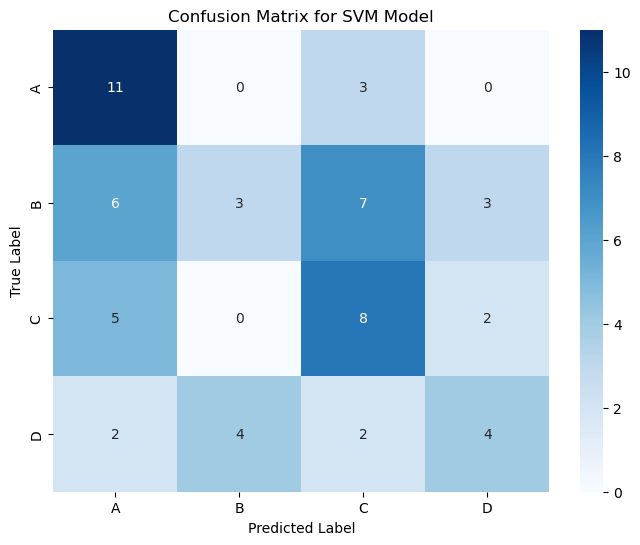

In [42]:
# put your code here
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Model')
plt.show()


Does SVM classifier work much better than your percetron?

<font size=6 color="#009600">&#9998;</font> The SVM classifier has a 43.33% accuracy which is definitely better than the percetron at 27.33%, but both can definitely be improved.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
### 3.2 PCA 

Although we only have 11 feature variables in the dataset, let's examine how much principal component analysis (PCA) can accelerate the classification. We will increase the PCA components from 1 to 11. For each case, we will perform a GridSearch and use test set to examine the accuracy. 

* Write a code to loop over n_components = 1 through 11. **4 pt**
* Record the accuracy of each case and plot the profile of accuracy versus n_components. In the mean time, record the computer run times and plot the profile of time versus n_components. **2 pt**




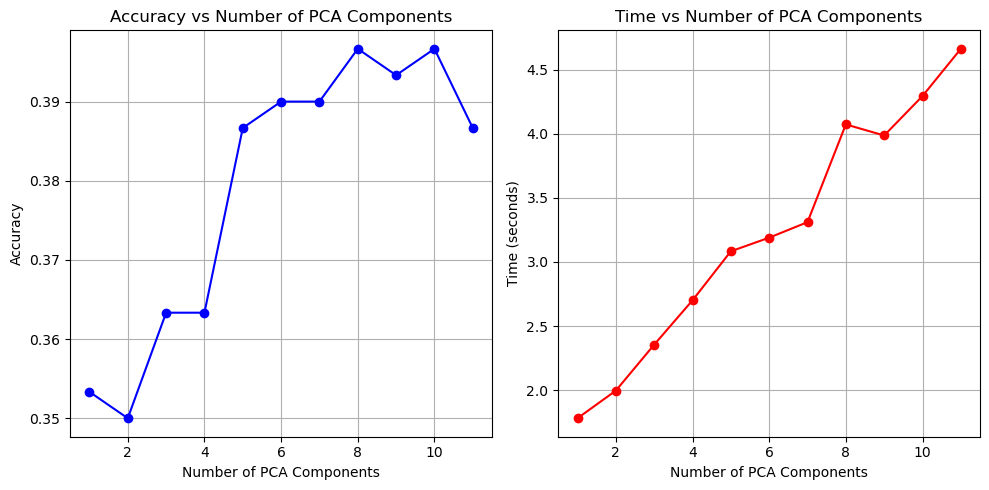

n_components=1, Accuracy=0.3533, Time=1.7816 seconds
n_components=2, Accuracy=0.3500, Time=1.9970 seconds
n_components=3, Accuracy=0.3633, Time=2.3553 seconds
n_components=4, Accuracy=0.3633, Time=2.7009 seconds
n_components=5, Accuracy=0.3867, Time=3.0835 seconds
n_components=6, Accuracy=0.3900, Time=3.1896 seconds
n_components=7, Accuracy=0.3900, Time=3.3106 seconds
n_components=8, Accuracy=0.3967, Time=4.0727 seconds
n_components=9, Accuracy=0.3933, Time=3.9863 seconds
n_components=10, Accuracy=0.3967, Time=4.2938 seconds
n_components=11, Accuracy=0.3867, Time=4.6622 seconds


In [45]:
# put your code here
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

X = data.drop(columns=['custcat'])
y = data['custcat']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

accuracies = []
times = []

for n_components in range(1, 12):
    pca = PCA(n_components=n_components)
    
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)
    
    svc = SVC(kernel='linear')
    
    param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}
    grid_search = GridSearchCV(svc, param_grid, cv=5)
    
    start_time = time.time()
    
    grid_search.fit(X_train_pca, y_train)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    times.append(elapsed_time)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 12), accuracies, marker='o', color='b')
plt.title("Accuracy vs Number of PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, 12), times, marker='o', color='r')
plt.title("Time vs Number of PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Time (seconds)")
plt.grid(True)

plt.tight_layout()
plt.show()

for n, acc, t in zip(range(1, 12), accuracies, times):
    print(f"n_components={n}, Accuracy={acc:.4f}, Time={t:.4f} seconds")



Please answer the following questions. 
* How is the overall accuracy of this SVM classifier?  **1 pt**
* If the performance is not good, what do you think the cause is? **2 pt**

<font size=6 color="#009600">&#9998;</font> The overall accuracy of this SVM classifier ranges from 35% to 39.67%, which is pretty low showing the accuracy isn't the best which may be from the dataset not having very descriptive features to seperate the classes. It also could be from the PCA components not finding enough variance.  

* Describe the curves of time vs n_components and accuracy vs n_components. **1 pt**
* Explain why the curves behave as they are in the figures **2 pt**

<font size=6 color="#009600">&#9998;</font> The curves of time vs n_components show a steady increase whch tells us the time grows as the amount of components increase. The curves of accuracy vs n_components show a rise at the beginning then peaks at 8 components which tells us increasing components helps the model find variance but after reaching 8, any more components cause a decrease.

### &#128721; STOP (1 Point)
**Pause, save and commit your FINAL changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**



In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University